In [1]:
from HiddenMess import *

import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings('ignore')

from sympy.parsing.sympy_parser import parse_expr
from sympy import simplify, init_printing, Float
from sympy.printing.str import StrPrinter

init_printing(use_unicode=True)
StrPrinter({'full_prec': False}).doprint(Float('10000000', 5))

cm = sns.light_palette("green", as_cmap=True)


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
df, medians = loadEverything()

In [3]:
(medians
   .pivot(index='Algorithm', columns='Dataset', values='RMSE')
   .style.background_gradient(cmap=cm)
)

Dataset,Chemical-I,F05128-f1,F05128-f2,Tower,airfoil,concrete,cpu,energyCooling,energyHeating,towerData,wineRed,wineWhite,yacht
Algorithm,,,,,,,,,,,,,
ElasticNet,0.375431,0.00508221,0.0045724,40.9573,6.20282,10.2589,39.482,4.4038,4.40574,43.5787,0.647188,0.76599,8.72393
IT-ELM (Lasso),0.371243,0.00326083,3.16334,25.4857,2.8409,6.91362,15.427,1.43093,0.443207,27.8771,0.639422,0.733173,1.0104
IT-ELM (OMP),0.391362,0.00303112,0.00272226,24.7319,2.59526,6.85467,35.8174,1.30526,0.484397,23.704,0.673337,0.735802,1.3655
Lars,0.364376,0.00739183,0.00669694,28.5478,4.74412,10.2652,29.1036,3.20019,2.86495,29.709,0.644901,0.748636,8.66475
Lasso,0.375431,0.00508191,0.00457216,31.8696,6.1769,10.2599,36.9396,4.08673,4.16626,33.1632,0.646397,0.759723,8.6779
MLP,0.451045,0.0230351,0.0297167,18.0228,4.76948,7.66712,25.1516,3.2879,2.67863,17.4673,0.625596,0.693388,2.19458
Ridge,0.152903,0.00508291,0.0045497,27.7281,4.80419,10.2652,29.1519,3.2104,2.92139,29.312,0.645409,0.753093,8.70156
SymTree,0.242377,0.00491776,0.00232647,nan,2.20506,6.07307,22.8216,1.67775,0.582412,nan,0.664746,nan,2.04592
XGBoost,0.330335,0.00366117,0.00446236,15.934,1.79661,4.12728,38.5646,0.729028,0.328354,15.7321,0.585609,0.656493,0.796345


In [4]:
(medians
   .pivot(index='Algorithm', columns='Dataset', values='Complexity')
   .style.background_gradient(cmap=cm)
)

Dataset,Chemical-I,F05128-f1,F05128-f2,Tower,airfoil,concrete,cpu,energyCooling,energyHeating,towerData,wineRed,wineWhite,yacht
Algorithm,,,,,,,,,,,,,
ElasticNet,2,1,1,19,3,8,4,5,5,20,7,7,6
IT-ELM (Lasso),1.5,39,9,53.5,40,39.5,11.5,77.5,133.5,59,12,33,26
IT-ELM (OMP),1,5,2,34.5,24.5,11,3,27,63,40.5,4,8,6.5
Lars,2,2,1,14,5,8,7,7,7,24,9,10,1
Lasso,2,1,1,13,3,8,4,5,5,13,7,6,3
MLP,32150,2000,2000,37550,3000,4500,28550,4500,4500,37550,900,30550,28050
Ridge,57,3,3,25,5,8,7,8,8,25,11,11,6
SymTree,476,4,24,nan,97,53,29,62,68,nan,380,nan,176
XGBoost,27,40.5,46,2978,1276.5,1245.5,378,1139.5,1681.5,2920.5,734.5,2237.5,643


In [5]:
(medians[['Algorithm','Rank']]
 .groupby('Algorithm')
 .mean()
 .sort_values(by='Rank')
 .style.bar(color='#00CCCC'))

,Rank
Algorithm,
XGBoost,2
SymTree,3.3
IT-ELM (Lasso),3.53846
IT-ELM (OMP),3.84615
MLP,5
Ridge,5.69231
Lars,5.76923
Lasso,6.76923
ElasticNet,7.76923


In [6]:
interact(plot_boxplots, df=fixed(df), dataset=datasets)

A Jupyter Widget

<function HiddenMess.plot_boxplots(df, dataset)>

In [7]:
interact(plot_scatterplots, df=fixed(df), dataset=datasets)

A Jupyter Widget

<function HiddenMess.plot_scatterplots(df, dataset)>

In [8]:
modelCPU, modelYacht, modelF1 = getModels()

In [9]:
expr     = parse_expr(genExprStr(modelF1).replace('x0', 'p').replace('x1', 'v').replace('x2','t'))
print('RMSE: 0.003')
simplify(expr)

RMSE: 0.003


In [10]:
expr     = parse_expr(genExprStr(modelCPU).replace('x2','maxMem').replace('x1', 'minMem').replace('x3', 'cache').replace('x5','maxChan'))
print('RMSE: 14.82')
expr.expand()#.simplify()

RMSE: 14.82


RMSE: 0.97


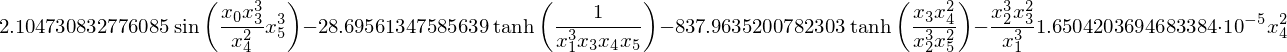

In [11]:
expr     = parse_expr(genExprStr(modelYacht))
print('RMSE: 0.97')
simplify(expr)